# FORD RETURNING TO INDIA!

### With ford returning to India and resuming its Manufacturing operations in Tamil Nadu for Export plans, 
### This case study focuses on how Ford could fit the Indian Automobile market if it would resume Sales in India along with Manufacturing

<a href = "https://www.business-standard.com/companies/news/ford-planning-to-re-enter-india-to-restart-tamil-nadu-plant-for-exports-124091300701_1.html"> News article regarding the above can be found here </a>

Data has been collected from https://www.marklines.com/en/vehicle_sales/

Desclaimer : There has been no assurance on the accuracy of data.

Pre work to this, Data Wrangling can be accessed here : 
https://github.com/r-sumanth/ford_India_return/tree/data_wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import regex as re

import warnings
warnings.filterwarnings('ignore')

### Part 1 : Understanding the dataset

#### Having datasets, one containing monthly sales data by maker/brand, another containing model wise sales since last decade

#### Let's explore the monthly sales dataset

In [2]:
monthly_brand_sales = pd.read_csv(os.getcwd()+'/cleaned/monthly_sales_master_data.csv',index_col=0)
monthly_brand_sales

,Type,Maker/Brand,Year,Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.,Annual,Monthly Avg
0,PassengerCar,VW,2024,1879.0,1631.0,1847.0,1183.0,1610.0,1656.0,1766.0,1876.0,0.0,0.0,0.0,0.0,13448.0,1681.0
1,PassengerCar,Skoda,2024,1242.0,1028.0,1374.0,1266.0,1542.0,1231.0,793.0,1125.0,0.0,0.0,0.0,0.0,9601.0,1200.0
2,PassengerCar,Toyota,2024,4052.0,4791.0,4551.0,4559.0,4639.0,4261.0,4962.0,4778.0,0.0,0.0,0.0,0.0,36593.0,4574.0
3,PassengerCar,Renault,2024,856.0,828.0,928.0,977.0,743.0,603.0,565.0,634.0,0.0,0.0,0.0,0.0,6134.0,767.0
4,PassengerCar,Hyundai,2024,21632.0,16809.0,16784.0,16413.0,16311.0,15986.0,16036.0,15776.0,0.0,0.0,0.0,0.0,135747.0,16968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,LightTruck,Piaggio,2007,0.0,0.0,0.0,0.0,96.0,203.0,93.0,0.0,558.0,524.0,450.0,651.0,2575.0,215.0
674,LightTruck,Eicher Motors,2007,845.0,708.0,925.0,268.0,497.0,507.0,464.0,301.0,383.0,481.0,381.0,459.0,6219.0,518.0
675,LightTruck,Force Motors,2007,576.0,707.0,993.0,362.0,543.0,640.0,700.0,884.0,1271.0,1154.0,1106.0,1099.0,10035.0,836.0
676,LightTruck,Ashok Leyland,2007,18.0,17.0,0.0,24.0,66.0,52.0,22.0,24.0,69.0,51.0,43.0,28.0,414.0,34.0


In [3]:
pd.set_option('display.max_rows',None)

In [4]:
monthly_brand_sales.dtypes

Type            object
Maker/Brand     object
Year             int64
Jan.           float64
Feb.           float64
Mar.           float64
Apr.           float64
May            float64
Jun.           float64
Jul.           float64
Aug.           float64
Sep.           float64
Oct.           float64
Nov.           float64
Dec.           float64
Annual         float64
Monthly Avg    float64
dtype: object

About the data:
* Type: Passernger/Commmute car, SUVs, Pickup trucks/Light trucks
* Maker/Brand : Manufacturer company
* Year : Year of sales data recorded (2007 - 2024)
* Months (Jan - Dec) : No. of Units sold in respective month
* Annual : No. of Units sold in respective year
* Monthly Avg : Avg No. of Units sold monthly

In [5]:
monthly_brand_sales.describe()

,Year,Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,Dec.,Annual,Monthly Avg
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,6.780000e+02,678.000000
mean,2015.371681,7566.721239,7437.504425,7851.230088,6590.719764,6407.100295,6622.563422,7046.542773,7084.716814,6930.358407,7276.749263,6652.746313,6201.780236,8.366873e+04,7172.986726
std,5.004331,16001.022035,15812.264578,15900.934035,14648.309801,14063.237208,13523.265450,14608.968365,14553.348867,14992.797889,15524.211723,14849.142617,13484.403694,1.725218e+05,14766.971463
min,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2011.000000,249.250000,254.250000,323.000000,162.250000,199.750000,247.250000,259.000000,256.250000,204.250000,210.250000,157.000000,176.000000,3.461750e+03,293.250000
50%,2015.000000,1528.000000,1501.000000,1786.000000,1202.000000,1300.500000,1510.000000,1513.500000,1606.500000,1297.500000,1361.500000,1113.000000,1255.000000,1.979400e+04,1674.500000
75%,2020.000000,6954.000000,7398.500000,8121.750000,5497.000000,5247.000000,6356.250000,6555.250000,6815.000000,6174.250000,6808.500000,5681.500000,5770.750000,8.094000e+04,6745.000000
max,2024.000000,111060.000000,105986.000000,110717.000000,126744.000000,119151.000000,102530.000000,112131.000000,115897.000000,116886.000000,124951.000000,107660.000000,103838.000000,1.302477e+06,108540.000000


Types/Category of Automobile :

In [6]:
monthly_brand_sales['Type'].unique()

array(['PassengerCar', 'SUV', 'LightTruck'], dtype=object)

In [7]:
monthly_brand_sales.describe(include=np.object_)

,Type,Maker/Brand
count,678,678
unique,3,41
top,SUV,Tata
freq,284,54


Insights : 
* SUV has been the most repeated car segment in the dataset
* Tata has been the most repeated Brand as it offers Automobiles from all the 3 different categories 

Data of which all brands are available : 

In [8]:
monthly_brand_sales['Maker/Brand'].unique()

array(['VW', 'Skoda', 'Toyota', 'Renault', 'Hyundai', 'Honda', 'Suzuki',
       'Tata', 'Other', 'Nissan', 'Jeep', 'Citroen', 'Kia',
       'Mahindra & Mahindra', 'Isuzu', 'Force Motors', 'MG',
       'Eicher Motors', 'Ashok Leyland', 'EKA Mobility', 'Datsun', 'Ford',
       'Jeep (2009-20)', 'Mitsubishi', 'Fiat', 'Piaggio',
       'KG Mobility / Ssangyong', 'Chevrolet', 'Abarth',
       'Hindustan Motors', 'Mahindra Trucks and Buses',
       'Mahindra Navistar Automotives', 'Audi', 'Mercedes-Benz', 'BMW',
       'Jaguar/Land Rover', 'International Cars & Motors',
       'Mahindra Renault', 'Hindustan Motors/Mitsubishi', 'Mazda', 'GM'],
      dtype=object)

#### Now, let's explore model wise sales dataset

In [9]:
model_wise_sales = pd.read_csv(os.getcwd()+'/cleaned/annual_model_sales_master_data.csv',index_col=0)
model_wise_sales.head(10)

,Maker/Brand,Type,Segment,Model,PowerTrain,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
0,Honda,PassengerCar,A,Brio,ICE,0.0,0.0,13246.0,10618.0,7260.0,5412.0,2277.0,3.0,0.0,0.0,0.0,0.0,38816.0
1,Honda,PassengerCar,A,Brio Amaze,ICE,0.0,0.0,65505.0,63831.0,35388.0,28314.0,67563.0,67715.0,37484.0,39697.0,46528.0,41292.0,493317.0
2,Honda,PassengerCar,B,Fit (Jazz),ICE,0.0,0.0,0.0,29644.0,34902.0,29890.0,18370.0,9512.0,3254.0,7259.0,4167.0,0.0,136998.0
3,Honda,PassengerCar,C,Civic,ICE,1099.0,74.0,0.0,0.0,0.0,0.0,0.0,4928.0,1225.0,6.0,0.0,0.0,7332.0
4,Honda,PassengerCar,C,Honda City,ICE,32404.0,21530.0,77346.0,82922.0,57619.0,62573.0,42045.0,28696.0,21826.0,34133.0,38335.0,20216.0,519645.0
5,Honda,PassengerCar,D,Accord,ICE,662.0,520.0,0.0,0.0,27.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,1266.0
6,Honda,SUV,SUV-B,BR-V,ICE,0.0,0.0,0.0,0.0,16820.0,12275.0,7140.0,2857.0,60.0,0.0,0.0,0.0,39152.0
7,Honda,SUV,SUV-B,WR-V,ICE,0.0,0.0,0.0,0.0,0.0,39808.0,36835.0,19947.0,6548.0,8044.0,5992.0,186.0,117360.0
8,Honda,SUV,SUV-C,Elevate,ICE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22595.0,22595.0
9,Honda,SUV,SUV-D,CR-V,ICE,294.0,873.0,823.0,914.0,736.0,363.0,629.0,1083.0,196.0,13.0,0.0,0.0,5924.0


In [10]:
model_wise_sales.columns

Index(['Maker/Brand', 'Type', 'Segment', 'Model', 'PowerTrain', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Total'],
      dtype='object')

About the data : 
* Maker/Brand : Manufacturer company
* Type : Passernger/Commmute car, SUVs, Pickup trucks/Light trucks
* Model : Model Name
* PowerTrain : Type of Engine, Internal Combustion Engine (ICE), Electric Vehicle (EV), Hybrid Vehicle (HV)
* Segment : SubCategory of Type, this can be found in detail <a href='https://www.detailingdevils.com/blog/all-the-car-segments-in-india-explained#:~:text=What%20are%20the%20differences%20between,typically%20found%20in%20higher%20segments.'>here</a>
* Years (2012- 2023) : Annual Sales in No. of Units
* Total : Total No. of Units of that model sold since 2012
    

In [11]:
model_wise_sales.describe()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,7973.879781,7259.786885,12979.699454,14300.459016,15406.683060,16950.311475,17861.879781,15869.109290,13116.180328,16596.939891,20415.475410,22079.153005,1.808096e+05
std,38253.545616,38520.324366,35432.722788,38118.087946,36913.458907,40846.004341,44070.122759,37747.653776,31083.050632,36198.233564,41806.853913,45124.512719,3.643450e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.656000e+03
50%,0.000000,0.000000,0.000000,1.000000,3.000000,13.000000,5.000000,100.000000,1.000000,0.000000,0.000000,0.000000,3.913200e+04
75%,141.500000,47.000000,5328.000000,9499.000000,9448.000000,10079.000000,10557.500000,10343.500000,6264.500000,14560.000000,22872.000000,20936.500000,1.697830e+05
max,450698.000000,452877.000000,264544.000000,272096.000000,245094.000000,257732.000000,264612.000000,208087.000000,160765.000000,183850.000000,217317.000000,203469.000000,2.248777e+06


In [12]:
model_wise_sales.describe(include=np.object_)

,Maker/Brand,Type,Segment,Model,PowerTrain
count,183,183,183,183,183
unique,17,3,13,181,3
top,Suzuki,SUV,B,Camry,ICE
freq,29,94,32,2,173


Insights :
* Most repeated brand : Suzuki
* Most repeated car category : SUV
* 17 Brands involved in Automobile market since last decade

In [13]:
model_wise_sales['Segment'].unique()

array(['A', 'B', 'C', 'D', 'SUV-B', 'SUV-C', 'SUV-D', 'MPV', 'F', 'SUV-E',
       'Pickup Truck', 'SUV-A', 'E'], dtype=object)

In [14]:
model_wise_sales['Maker/Brand'].value_counts()

Maker/Brand
Suzuki                 29
Tata                   21
Hyundai                19
Mahindra & Mahindra    18
Toyota                 17
VW                     12
Honda                  11
Renault                10
Skoda                   9
Nissan                  9
Ford                    8
Kia                     5
Citroen                 4
Fiat                    3
Datsun                  3
Isuzu                   3
Jeep                    2
Name: count, dtype: int64

Insights : 
* Car Type/Category is further classified as Segment based on the size, features and luxury provided 
* No. of models operated by the brand since last decade is shown above 

### Part 2 : Let's explore Automobile market and recent trends

#### Excluding 2024 from the datasets below as it may bring down the values of annual performance

In [15]:
pd.options.display.float_format = '{:.2f}'.format

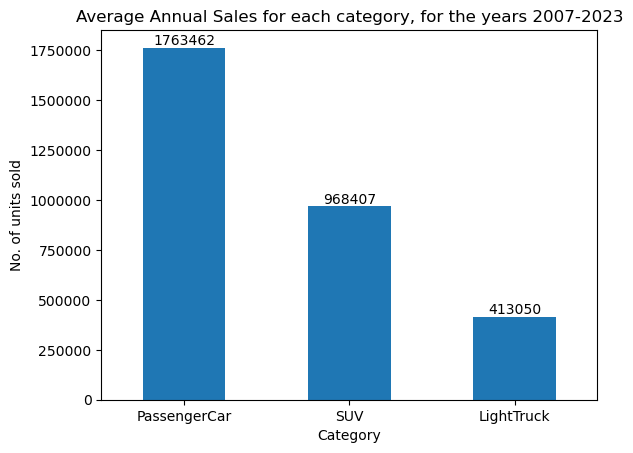

In [16]:
ax = monthly_brand_sales[monthly_brand_sales['Year']!=2024].groupby('Type').sum()[['Annual']].apply(lambda x : x/(2024-2007)).sort_values(by='Annual',ascending=False).plot.bar(legend=False)
plt.ticklabel_format(style='plain',axis='y')
for label in ax.containers:
    ax.bar_label(label,fmt='{:.0f}')
plt.title('Average Annual Sales for each category, for the years 2007-2023')
plt.xlabel('Category')
plt.ylabel('No. of units sold')
plt.xticks(rotation=0);


#### Conclusion : Passenger car segment has been the most sold category since 2007

#### Splitting data for different automobile caterories:

In [17]:
passenger_car_monthly = monthly_brand_sales[monthly_brand_sales['Type']=='PassengerCar']
suv_monthly = monthly_brand_sales[monthly_brand_sales['Type']=='SUV']
light_truck_monthly = monthly_brand_sales[monthly_brand_sales['Type']=='LightTruck']

passenger_car_monthly.reset_index(drop=True,inplace=True)
suv_monthly.reset_index(drop=True,inplace=True)
light_truck_monthly.reset_index(drop=True,inplace=True)

passenger_car_monthly.drop(columns='Type',axis=1,inplace=True)
suv_monthly.drop(columns='Type',axis=1,inplace=True)
light_truck_monthly.drop(columns='Type',axis=1,inplace=True)

#### Annual Average Sale for top 10 Makers from (2007-2023) by automobile category:

#### For Passenger Cars category:

<Figure size 800x800 with 0 Axes>

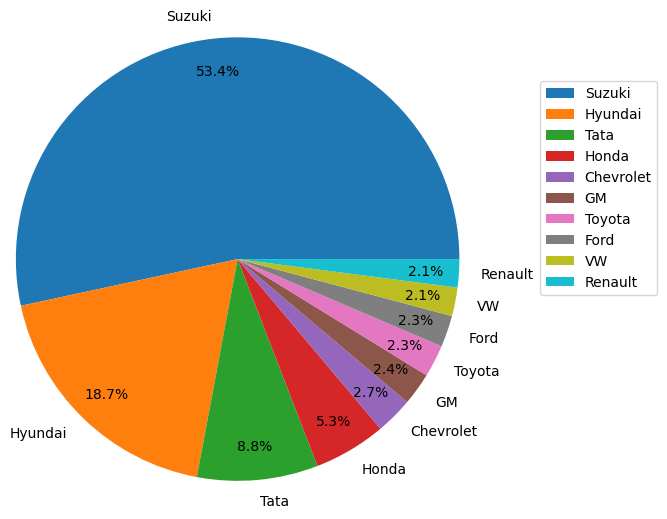

In [18]:
plt.figure(figsize=(8,8))
passenger_car_monthly[passenger_car_monthly['Year']!=2024].groupby('Maker/Brand').mean(numeric_only=True)[['Annual']].sort_values(by='Annual',ascending=False).head(10).plot.pie(y='Annual',radius=1.5,autopct='%.1f%%',pctdistance=0.85)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.3,1));


#### For SUV category :

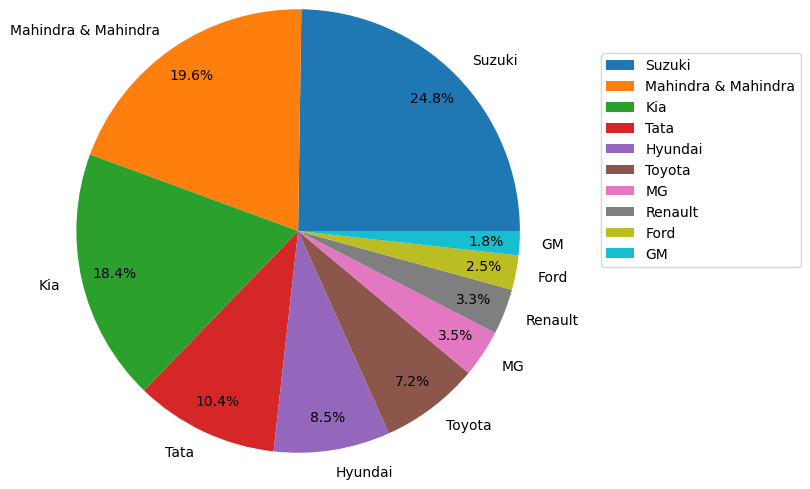

In [19]:
suv_monthly[suv_monthly['Year']!=2024].groupby('Maker/Brand')[['Annual']].mean().sort_values(by='Annual',ascending=False).head(10).plot.pie(y='Annual',radius=1.5,autopct='%.1f%%',pctdistance=0.85)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.3,1));


#### For Pickup Truck category :

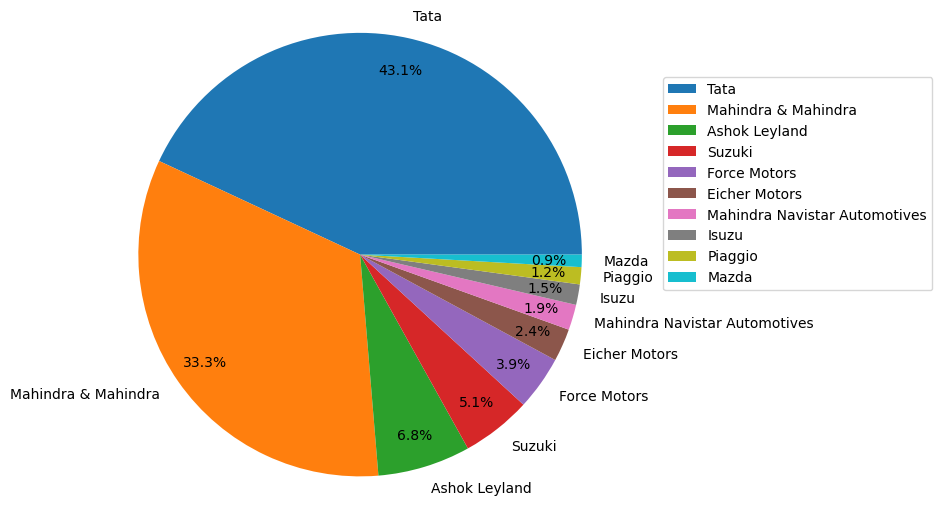

In [20]:
light_truck_monthly[light_truck_monthly['Year']!=2024].groupby('Maker/Brand')[['Annual']].mean().sort_values(by='Annual',ascending=False).head(10).plot.pie(y='Annual',radius=1.5,autopct='%.1f%%',pctdistance=0.85)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.3,1));

#### Conclusion : Following Brands were identified as top players of 
* Passenger cars : Suzuki & Hyundai
* SUV/MPV s : Suzuki, Mahindra & Kia
* Pickup Trucks : Tata & Mahindra 

#### Exploring recent trend of sales, considering last 5 years:

Filter out the dataframe to have data of last 5 years (from 2019 July - 2024 July)

In [21]:
months = monthly_brand_sales.columns[3:-2]
categories = monthly_brand_sales['Type'].unique()
sales_trend={}

for df,category in zip([passenger_car_monthly,suv_monthly,light_truck_monthly],categories):
    year_month=[]
    sales=[]
    for indx, value in df.groupby('Year').sum()[months].loc[[2019,2020,2021,2022,2023,2024]].iterrows():
        for i,month in enumerate(months):
            if indx == 2024:
                if i<7:
                    year_month.append(str(indx)+' '+month),
                    sales.append(value[i])
                else:
                    continue
            elif indx == 2019:
                if i>5:
                    year_month.append(str(indx)+' '+month),
                    sales.append(value[i])
                else:
                    continue
            else:
                year_month.append(str(indx)+' '+month),
                sales.append(value[i])
                
    sales_trend.update({category:pd.DataFrame(data=dict({'month':year_month,'sales':sales}))})
    

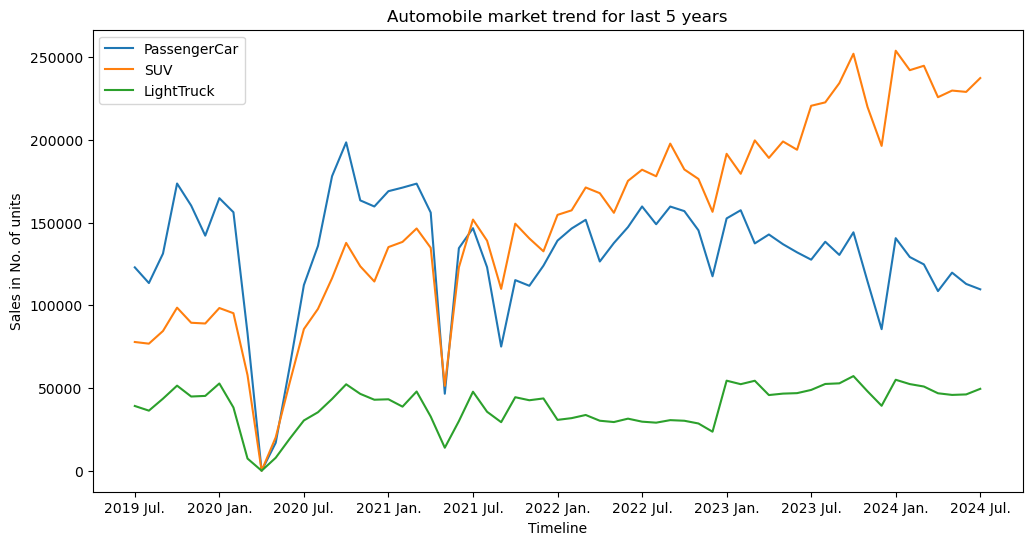

In [22]:
fig = plt.figure(figsize=(12,6))

for category in categories:
    sns.lineplot(x='month',y='sales',data=sales_trend[category],label=category)
    
plt.xticks(ticks=sales_trend[category].month[0::6])
plt.title('Automobile market trend for last 5 years')
plt.ylabel('Sales in No. of units')
plt.xlabel('Timeline');

#### It can be observed from the above plot that Sales of SUV is on the rise Post COVID Pandemic (2021 June) and has surpassed the Passenger car segment, which had the market lead before

To confirm on the above obserbation, let us look at the per capita (PPP) income trend

The data has been collected from https://www.imf.org/external/datamapper/PPPGDP@WEO/IND

In [23]:
per_capita_income = pd.read_excel('imf-dm-export-20240922.xls')
per_capita_income.dropna(inplace=True)
per_capita_income.rename(columns={'GDP per capita, current prices (Purchasing power parity; international dollars per capita)' : 'year'},inplace=True)
per_capita_income.drop(columns=range(1980,2007),inplace=True,axis=1)
per_capita_income.set_index('year',inplace=True)
per_capita_income = per_capita_income.T
per_capita_income.head()

year,India
2007,3510.97
2008,3636.96
2009,3892.56
2010,4216.18
2011,4467.47


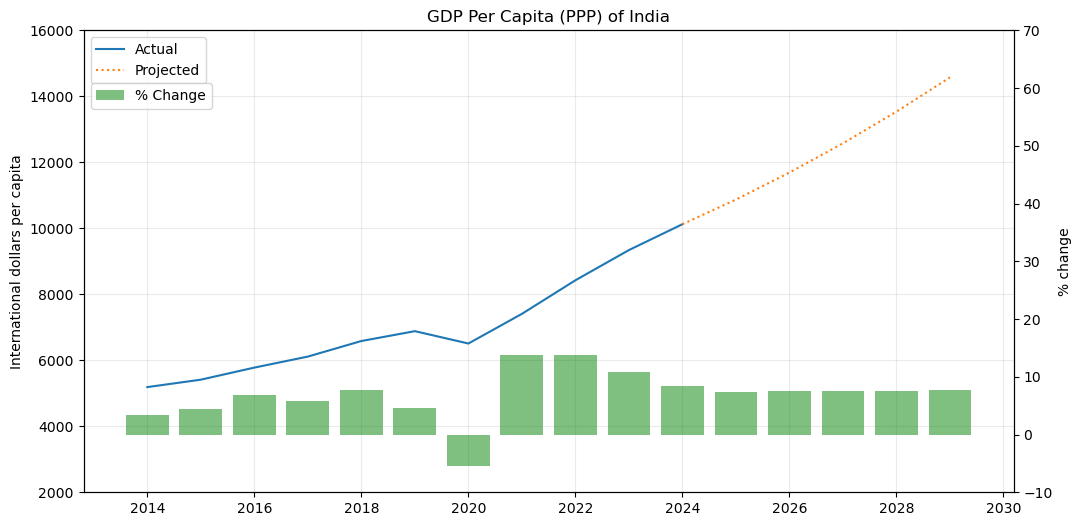

In [24]:
change = [0]
for i in range(1,len(per_capita_income)):
    change.append((per_capita_income.iloc[i,0]-per_capita_income.iloc[i-1,0])*100/per_capita_income.iloc[i-1,0])
    
per_capita_income['change_%']=change


fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(per_capita_income.iloc[7:-5,0],label='Actual')
ax1.plot(per_capita_income.iloc[-6:,0],linestyle=':',label='Projected')
ax1.set_ylim((2000,16000))
ax1.grid(True,alpha=0.25)
ax1.set_ylabel('International dollars per capita')
ax1.legend(loc='upper left')

ax2=ax1.twinx()
ax2.bar(per_capita_income.index[7:],per_capita_income.iloc[7:]['change_%'],alpha=0.5,color='green',label='% Change')
ax2.set_ylim((-10,70))
ax2.set_ylabel('% change')
ax2.legend(bbox_to_anchor=(0.145,0.90))

plt.title('GDP Per Capita (PPP) of India');

#### We can observe that the per capita income has higher growth rate since the Post COVID period, and so the purchasing power of people, and hence SUVs has taken lead in the sales market

#### Let us forecast the sales for next five years :

#### Using simple linear regression algorithm, let us project the sales for each category in next 6 years, including 2024 as Annual data hasn't be recorded at the moment

In [25]:
#using Ridge regression to prevent overfitting of data
from sklearn.linear_model import Ridge

predicted = {}

for df,category in zip([passenger_car_monthly,suv_monthly,light_truck_monthly],categories):
    df = df.groupby('Year').sum()['Annual'].drop(index=2024).reset_index()
    #taking into account per_capita_income to have better clarity of market trend
    df['income_per_capita'] = per_capita_income['India'][:-6].values
    
    predictions = []
    
    for i in [10,100,1000,10000]:
        ridge_model = Ridge(alpha=i)
        ridge_model.fit(X=df[['Year','income_per_capita']],y=df['Annual'])
        predictions.append(ridge_model.predict(X=list(zip(np.arange(2024,2030),per_capita_income['India'].loc[2024:].values))))

    
    predicted.update({category:pd.DataFrame(data={'Year':np.arange(2024,2030),
                                                  #taking out the mean for prediction under different alpha values
                                                 'predicted_sales':np.mean(np.array(predictions),axis=0)})})


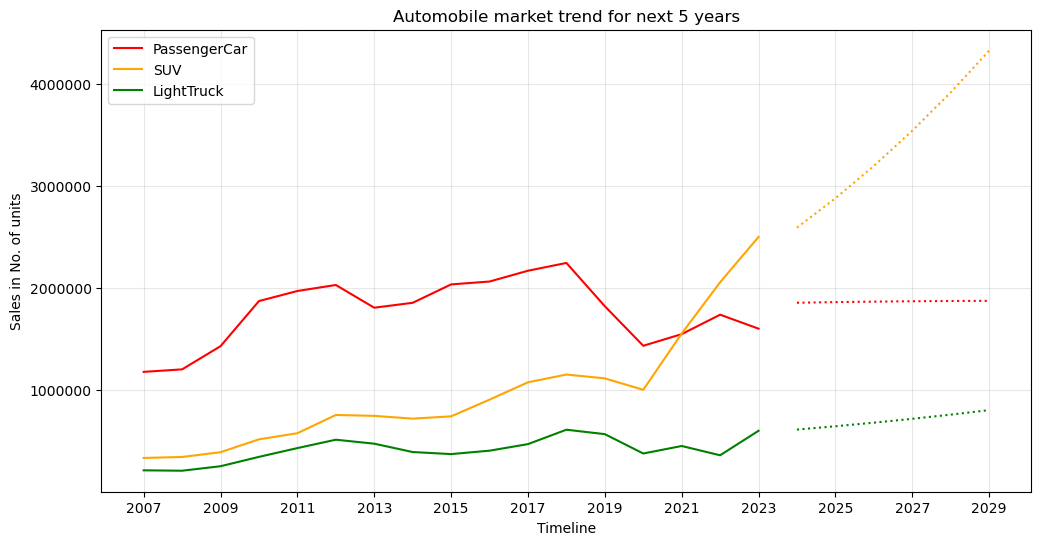

In [26]:
fig = plt.figure(figsize=(12,6))

for category,df,colour in zip(categories,[passenger_car_monthly,suv_monthly,light_truck_monthly],['red','orange','green']):
    sns.lineplot(x='Year',y='predicted_sales',data=predicted[category],color=colour,linestyle=':')
    sns.lineplot(data=df.groupby('Year').sum()['Annual'].drop(index=2024),label=category,color=colour)

plt.grid(True,alpha=0.3)
plt.xticks(ticks=np.arange(2007,2030)[0::2])
plt.title('Automobile market trend for next 5 years')
plt.ylabel('Sales in No. of units')
plt.ticklabel_format(style='plain')
plt.xlabel('Timeline');


#### Conclusion : Trend suggests that there will be significant rise for SUV segment while Passenger car segment may remain stagnant, and Pickup Trucks may experience very slight increase in the sales over next 5 years

#### Let's explore in depth about these categories

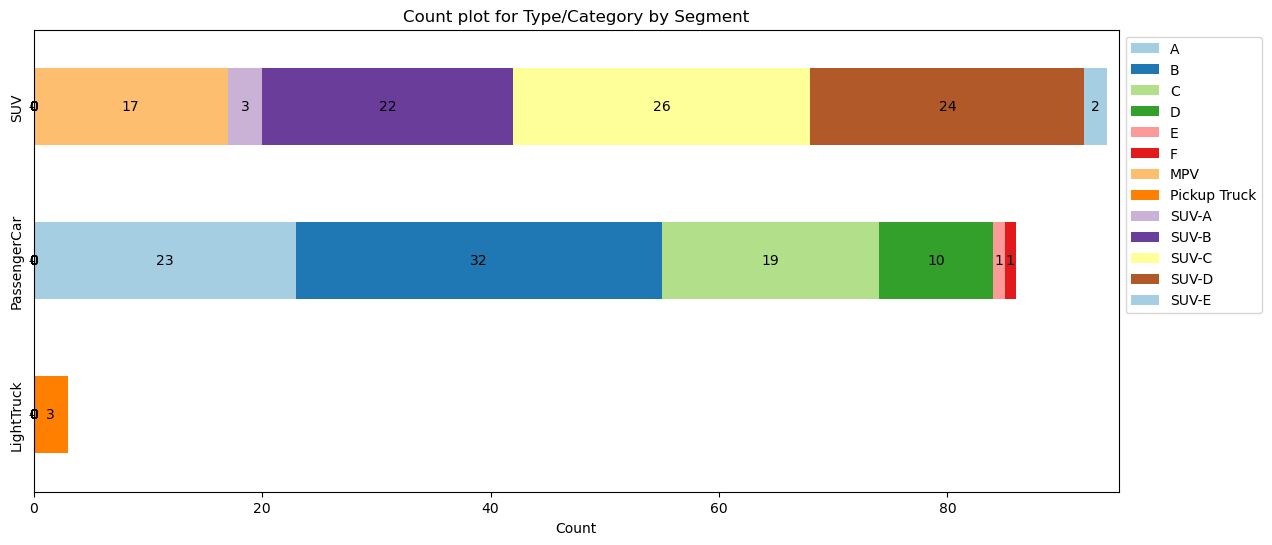

In [27]:
ax = model_wise_sales.groupby(['Type', 'Segment']).size().reset_index().pivot(columns='Segment', index='Type', values=0).plot.barh(stacked=True,color=sns.color_palette("Paired"),figsize=(14,6))
for label in ax.containers:
    ax.bar_label(label,label_type='center')
ax.legend(bbox_to_anchor=(1,1))
plt.yticks(rotation=90,va='center')
plt.xlim((0,95))
plt.xlabel('Count')
plt.ylabel(None)
plt.title('Count plot for Type/Category by Segment');

#### Conclusion : By the count plot above,
* More number of SUVs models have operated in the market, compared to other categories
* SUV-C, SUV-D, SUV-B, MPV are having a competitive market in SUV by the looks of number models operated
* Segment B and A are dominating in the Passenger car category

Disclaimer : model_wise_sales has very limited data on Pickup trucks and EVs, so analyzing those data will lead to inaccurate results

### Part 3 : Let's explore how Ford had performed in Indian Automobile market.

Ford had operated in India till 2021, let's see how Ford had performed

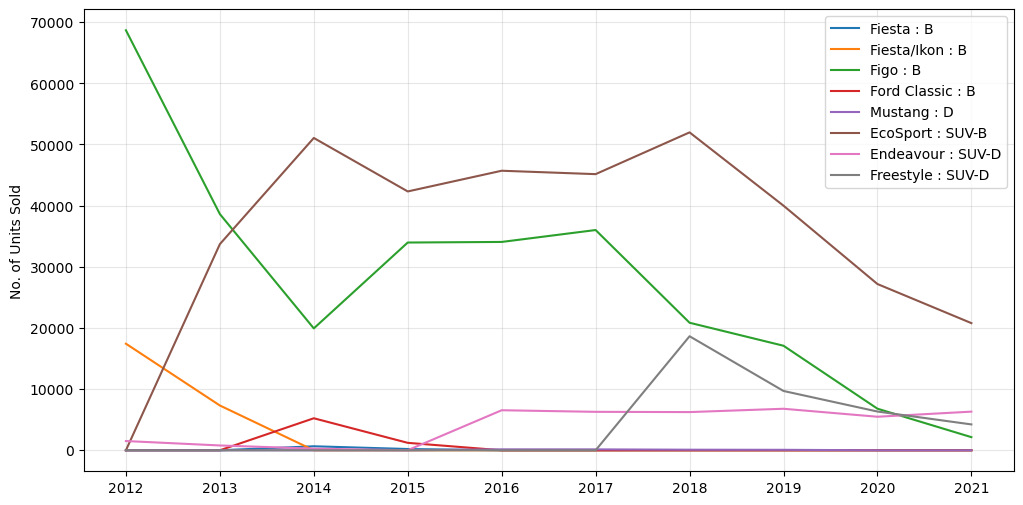

In [28]:
ford_cars = model_wise_sales[model_wise_sales['Maker/Brand']=='Ford'].iloc[:,:-3]
ford_cars

plt.figure(figsize=(12,6))

for indx,content in ford_cars.iterrows():
    ax = sns.lineplot(x=ford_cars.columns[5:],y=content.values[5:],label=content[3]+' : '+content[2])

plt.xlabel(None)
plt.ylabel('No. of Units Sold')
plt.grid(True,alpha=0.3)

Ford focused on most attractive segments of B (Figo) and SUV-B (EcoSport), but struggled at the market since 2018. Let's review its compititors,

In [29]:
model_wise_sales[(model_wise_sales['2018']==0) & (model_wise_sales['2019']!=0)]

,Maker/Brand,Type,Segment,Model,PowerTrain,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
3,Honda,PassengerCar,C,Civic,ICE,1099.00,74.00,0.00,0.00,0.00,0.00,0.00,4928.00,1225.00,6.00,0.00,0.00,7332.00
54,Hyundai,SUV,SUV-C,Kona,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,292.00,223.00,121.00,933.00,501.00,2070.00
56,Hyundai,SUV,SUV-C,Venue,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70443.00,82428.00,108007.00,120703.00,129278.00,510859.00
60,Kia,SUV,SUV-C,SELTOS,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45226.00,97382.00,98187.00,101569.00,104891.00,447255.00
81,Tata,SUV,SUV-D,Tata Harrier,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15227.00,14071.00,28038.00,32260.00,23646.00,113242.00
92,Mahindra & Mahindra,SUV,SUV-B,XUV300,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40503.00,32197.00,47432.00,60260.00,59315.00,239707.00
119,Suzuki,SUV,SUV-A,S-Presso,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35254.00,67690.00,65478.00,65276.00,31368.00,265066.00
132,Suzuki,SUV,MPV,XL6,HV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15240.00,23508.00,39902.00,38368.00,38614.00,155632.00
159,Renault,SUV,MPV,Triber,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24142.00,38906.00,32766.00,33954.00,23164.00,152932.00
167,Toyota,PassengerCar,C,Glanza,ICE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17946.00,20676.00,26051.00,33185.00,50537.00,148395.00


By the above data, we can clearly see many new models were launched in 2019, bringing in much more competition in respective segments.

Downfall of Ford could depend on various factors like Features offered, Servicing & Cost of maintenance. Thus, a different dataset regarding that is needed to concluse the reason.

For now, let's check what segment is relevant and is in demand in the recent times (considering 3 years)

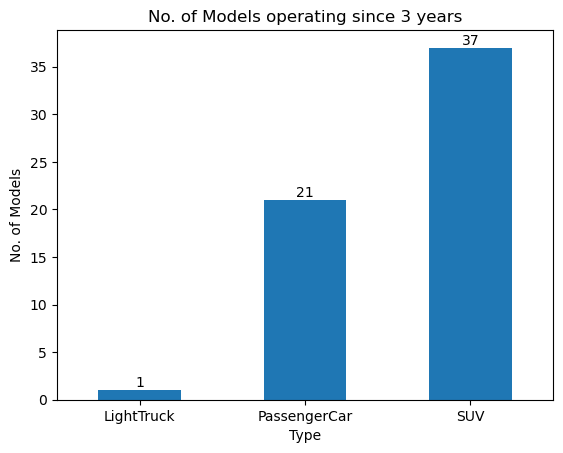

In [30]:
ax = model_wise_sales[(model_wise_sales['2023']!=0)&(model_wise_sales['2022']!=0)&(model_wise_sales['2021']!=0)].groupby('Type').count()[['Total']].plot.bar(legend=False)
plt.xticks(rotation=0)
for label in ax.containers:
    ax.bar_label(label)
plt.title('No. of Models operating since 3 years')
plt.ylabel('No. of Models');


#### It can be observed that more SUV models are operational compared to Passenger cars, since last 3 years

### Conclusion and Findings :

* Market for SUVs is is on the rise while other catergories may experience little growth.
* With Manufacturers/Brand's policies towards EV/HV approach, SUV segment may be the best bet to enter as Fords compititors have limited EV/HVs available as of now.
